# Visualization Case Study

## Information on the Diamond Dataset
In this lesson, you'll be working with a dataset regarding the prices and attributes of approximately 54,000 round-cut diamonds. You'll go through the steps of an explanatory data visualization, systematically starting from univariate visualizations, moving through bivariate visualizations, and finally multivariate visualizations. Finally, you'll work on polishing up selected plots from the analysis so that their main points can be clearly conveyed to others.

You can find a copy of the dataset in the Resources tab of the classroom; it will automatically be available to you in the workspaces of this lesson. The dataset consists of almost 54,000 rows and 10 columns:

- price: Price in dollars. Data was collected in 2008.
- carat: Diamond weight. 1 carat is equal to 0.2 grams.
- cut: Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
- color: Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
- clarity: Measure of diamond inclusions. Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
- x, y, z: Diamond length, width, and depth, respectively, in mm.
- table: Ratio of width of top face of diamond to its overall width, as a percentage.
- depth: Proportional depth of diamond, as a percentage. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

For the case study, we will concentrate only the variables in the top five bullet points: price and the four 'C's of diamond grade. Our focus will be on answering the question about the degree of importance that each of these quality measures has on the pricing of a diamond. You can see an example report covering all of the variables in the project information lesson.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [3]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

In [5]:
np.log10(diamonds.price).describe()

count    53940.000000
mean         3.381751
std          0.440657
min          2.513218
25%          2.977724
50%          3.380392
75%          3.726258
max          4.274689
Name: price, dtype: float64

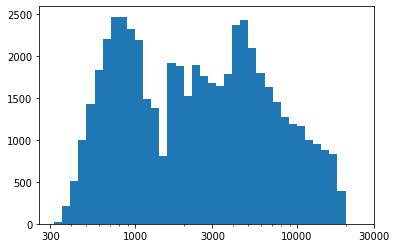

In [6]:
# Get a histogram of base 10 log price 
bins = 10**np.arange(2.5,4.3+0.05,0.05)
ticks = [300,1000,3000,10000,30000]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = diamonds, x = 'price',bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels);

Under a log scale, I see that the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail

Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

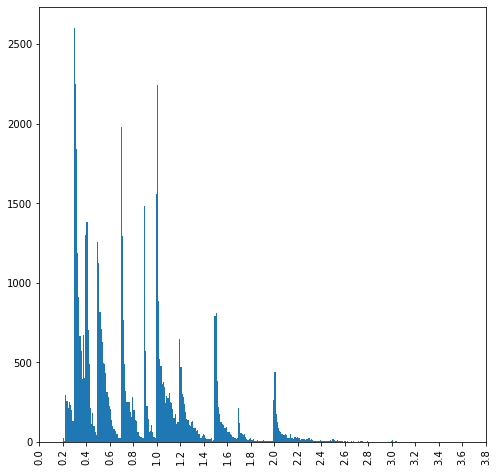

In [63]:
# univariate plot of carat weights
plt.figure(figsize= [8,8])
bins = np.arange(0.2,5+0.01,0.01)
ticks = [i/5 for i in range(20)]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = diamonds, x = 'carat',bins =bins)
plt.xlim(0,3)
plt.xticks(ticks,labels)
plt.xticks(rotation = 90);

I see an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. In this case, it's a good idea to set the bin size small (e.g. 0.01) and zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size conventions?

Now, I will move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

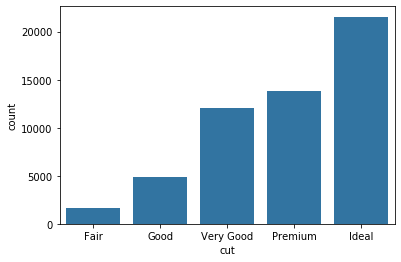

In [8]:
# univariate plots of cut, color, and clarity grades
base_color = sb.color_palette()[0]

cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
ordered_cut_type = pd.api.types.CategoricalDtype(ordered = True, categories = cut_order)
diamonds['cut'] = diamonds.cut.astype(ordered_cut_type)

sb.countplot(data = diamonds, x = 'cut', color = base_color)

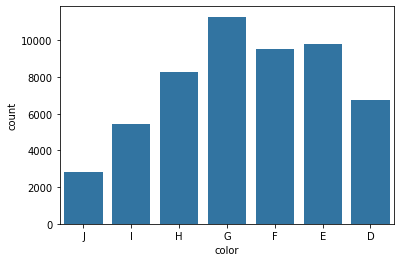

In [9]:
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
ordered_color_type = pd.api.types.CategoricalDtype(ordered = True, categories = color_order)
diamonds['color'] = diamonds.color.astype(ordered_color_type)

sb.countplot(data = diamonds, x = 'color', color = base_color)

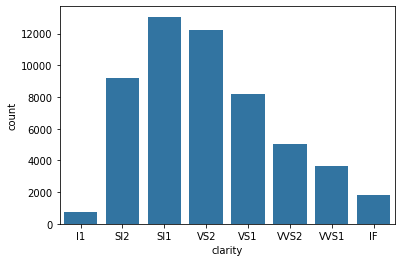

In [10]:
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
ordered_clarity_type = pd.api.types.CategoricalDtype(ordered = True, categories = clarity_order)
diamonds['clarity'] = diamonds.clarity.astype(ordered_clarity_type)

sb.countplot(data = diamonds, x = 'clarity', color = base_color)

The bar chart should show that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.

The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G. (There are other diamond grades that are worse than J, but they're not part of the collected data.)

There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions.

```
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    print
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])
```

## Bivariate Exploration

In the previous notebook, you looked at the univariate distribution of five features in the diamonds dataset: price, carat, cut, color, and clarity. Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

To start, construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

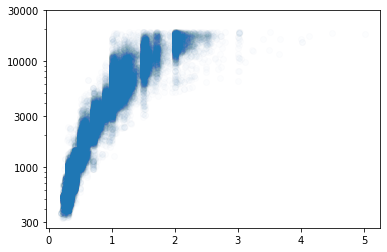

In [11]:
ticks = [300,1000,3000,10000,30000]
labels = ['{}'.format(v) for v in ticks]
plt.scatter(data = diamonds, x = 'carat', y= 'price',alpha = 1/100)
plt.yscale('log')
plt.yticks(ticks,labels);

Assuming that you put price on the y-axis and carat on the x-axis, the transformation should have changed the scatterplot from looking concave upwards (like an upwards-pointing bowl) to concave downards (like a downwards-pointing bowl). It would be nice to have a linear trend, wouldn't it? It turns out that the x, y, and z dimensions track a much more linear trend against price than carat does. Since carat is more recognizable a feature value, let's add a transformation to the x-axis to see the approximately linear trend. Since weight is proportional to volume, and since all the diamonds are cut in approximately the same way (round-cut), a cube-root transformation of carat should allow us to see an approximately linear trend.

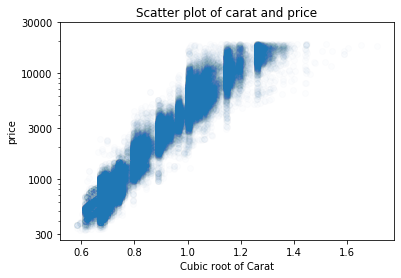

In [14]:
ticks = [300,1000,3000,10000,30000]
labels = ['{}'.format(v) for v in ticks]

plt.scatter(diamonds['carat']**(1/3),diamonds.price,alpha = 1/100)

plt.yscale('log')
plt.yticks(ticks,labels)
plt.title('Scatter plot of carat and price')
plt.xlabel('Cubic root of Carat')
plt.ylabel('price');

One thing that you might notice in the visualization after transformation is that the trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset. For diamonds above about 1.5 carats, we'd probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

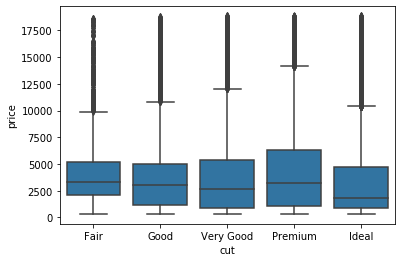

In [18]:
# box plot of price and cut

sb.boxplot(data = diamonds, x = 'cut', y = 'price', color = base_color);


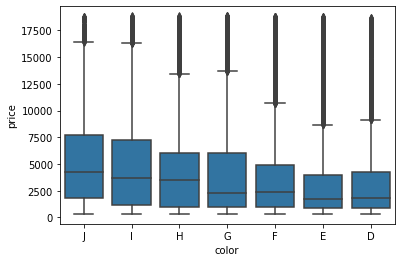

In [20]:
# box plot of price and color

sb.boxplot(data = diamonds, x = 'color', y = 'price', color = base_color);



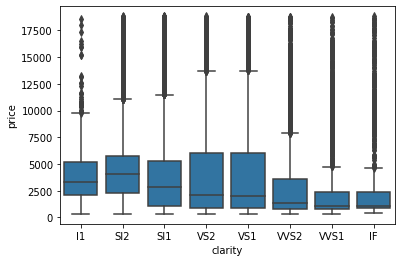

In [22]:
# box plot of price and clarity

sb.boxplot(data = diamonds, x = 'clarity', y = 'price', color = base_color);

There's a lot of different approaches you could have taken here. If you created a box plot, then you probably noticed something interesting and unintuitive: the median price of diamonds should tend to look like it _decrease_ with _increasing_ gem quality. Shouldn't we expect this to be the other way around? This deserves a deeper look. Is there a different plot type to choose that shows more details in the data?

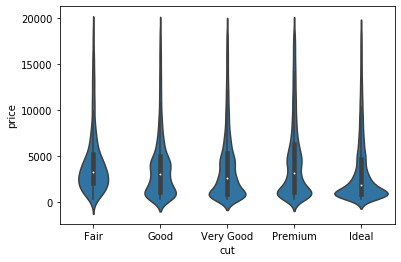

In [19]:
# violin plot of price and cut

sb.violinplot(data = diamonds, x = 'cut', y = 'price', color = base_color);



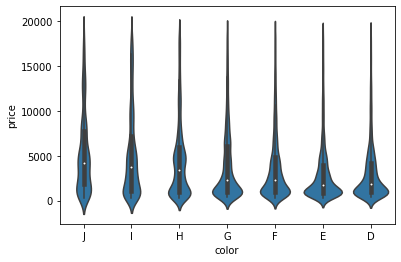

In [21]:
# violin plot of price and color

sb.violinplot(data = diamonds, x = 'color', y = 'price', color = base_color);



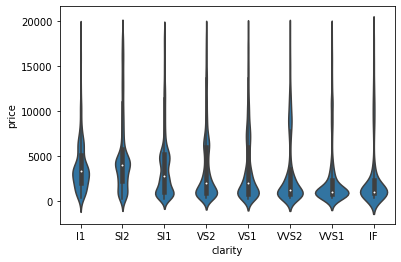

In [23]:
# violin plot of price and clarity

sb.violinplot(data = diamonds, x = 'clarity', y = 'price', color = base_color);




With a violin plot, you can get more insight into what causes the trend in median prices to appear as it does. Faceted histograms will also produce a similar result, though unless the faceting keeps the price axis common across facets, the trend will be harder to see. For each ordinal variable, there are multiple modes into which prices appear to fall. Going across increasing quality levels, you should see that the modes rise in price - this should be the expected effect of quality. However, you should also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result noted in the previous comment. This is clearest in the clarity variable. Let's keep searching the data to see if there's more we can say about this pattern.

Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables. Namely, how does carat weight change across the other three 'C' quality measures? You can take the same approach as the above investigation of price against the three categorical quality measures. What can you see in these plots, and how does this relate to your earlier investigations?

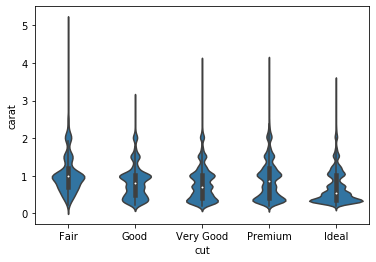

In [24]:
# violin plot of carat and cut

sb.violinplot(data = diamonds, x = 'cut', y = 'carat', color = base_color);



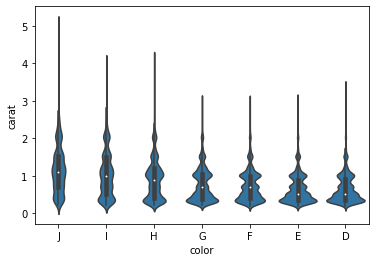

In [25]:
# violin plot of carat and color

sb.violinplot(data = diamonds, x = 'color', y = 'carat', color = base_color);



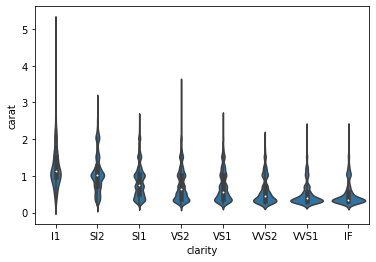

In [26]:
# violin plot of carat and clarity

sb.violinplot(data = diamonds, x = 'clarity', y = 'carat', color = base_color);



These plots should shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price. The challenge next will be on how to depict this in a multivariate plot.

## Multivariate Exploration

In the previous workspace, you looked at various bivariate relationships. You saw that the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. You also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.

The goal of this workspace will be to depict these interaction effects through the use of multivariate plots.

To start off with, create a plot of the relationship between price, carat, and clarity. In the previous workspace, you saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

In [30]:
diamonds['cub_root_carat'] = diamonds['carat']**(1/3)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cub_root_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.612693
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.594392
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.612693
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.661911
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.676790


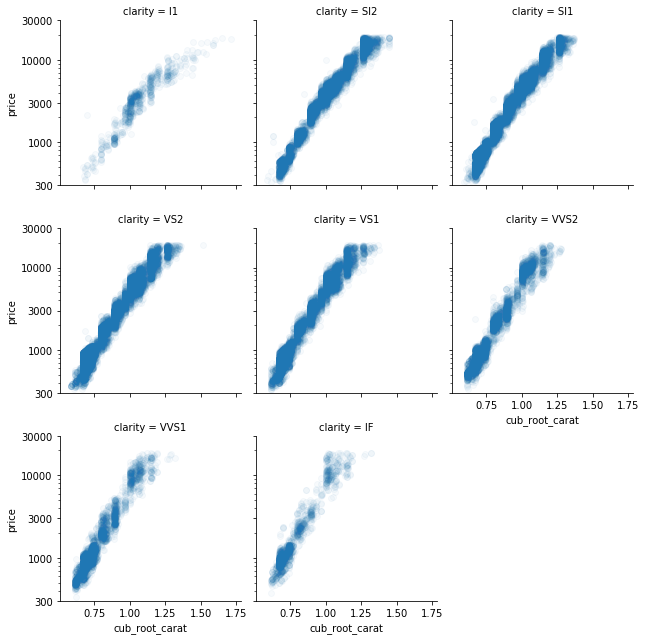

In [36]:
# multivariate plot of price by carat weight, and clarity

ticks = [300,1000,3000,10000,30000]
labels = ['{}'.format(v) for v in ticks]

g = sb.FacetGrid(data = diamonds, col = 'clarity',col_wrap = 3)
g.map(plt.scatter,'cub_root_carat','price',alpha = 1/30)

plt.yscale('log')
plt.ylim(300,30000)
plt.yticks(ticks,labels);

You should see across facets the general movement of the points upwards and to the left, corresponding with smaller diamond sizes, but higher value for their sizes. As a final comment, did you remember to apply transformation functions to the price and carat values?

Let's try a different plot, for diamond price against cut and color quality features. To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. For this plot, select diamonds in a small range around 1 carat weight. Try to make it so that your plot shows the effect of each of these categorical variables on the price of diamonds.

In [40]:
one_carat = diamonds.query('carat > 0.9 and carat < 1.1')
one_carat

,carat,cut,color,clarity,depth,table,price,x,y,z,cub_root_carat
97,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07,0.986485
126,0.91,Premium,H,SI1,61.4,56.0,2763,6.09,5.97,3.70,0.969052
128,0.91,Fair,H,SI2,64.4,57.0,2763,6.11,6.09,3.93,0.969052
129,0.91,Fair,H,SI2,65.7,60.0,2763,6.03,5.99,3.95,0.969052
204,0.98,Fair,H,SI2,67.9,60.0,2777,6.05,5.97,4.08,0.993288
...,...,...,...,...,...,...,...,...,...,...,...
53794,0.92,Premium,I,SI1,60.4,59.0,2730,6.31,6.24,3.79,0.972589
53863,1.00,Fair,I,SI2,66.8,56.0,2743,6.22,6.12,4.13,1.000000
53875,1.04,Very Good,I,I1,61.6,61.0,2745,6.45,6.47,3.98,1.013159
53879,1.04,Fair,G,SI2,65.2,57.0,2745,6.25,6.23,4.07,1.013159


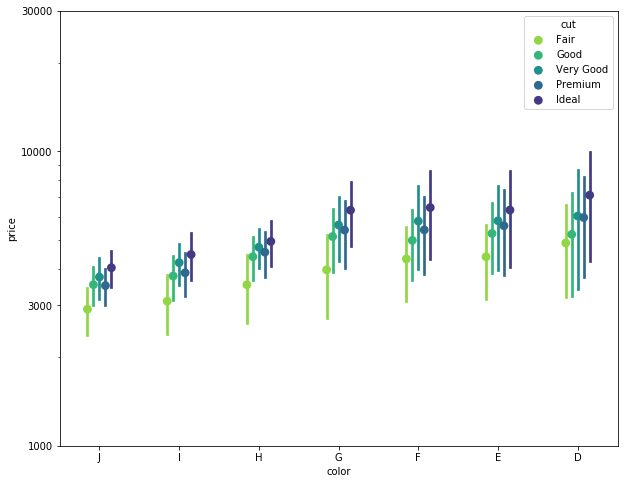

In [54]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds

plt.figure(figsize = [10,8])
ticks = [300,1000,3000,10000,30000]
labels = ['{}'.format(v) for v in ticks]

sb.pointplot(data = one_carat, x = 'color' , y = 'price' ,hue = 'cut',
             ci = 'sd', linestyles = '', palette = 'viridis_r',dodge = 0.3)
plt.yscale('log')
plt.yticks(ticks,labels)
plt.ylim(1000,30000);

Assuming you went with a clustered plot approach, you should see a gradual increase in price across the main x-value clusters, as well as generally upwards trends within each cluster for the third variable. Aesthetically, did you remember to choose a sequential color scheme for whichever variable you chose for your third variable, to override the default qualitative scheme? If you chose a point plot, did you set a dodge parameter to spread the clusters out?

## Explanatory Polishing

Through the last few workbooks, you've performed an exploration of a dataset relating the price of diamonds to their four 'C' attributes: carat, cut, color, and clarity. During that exploration, you found that the primary driver of price was carat weight, where the log of price was approximately linearly related to the cube root of carat weight, analogous to the diamond's length, width, or depth. The price was then modified by the diamond's cut, color, and clarity grades.

In this workbook, you'll polish two plots from the earlier exploration so that they can be presented to others in an understandable form.

The first plot to polish depicts the base relationship between price and carat. Make additions and revisions to the code below to refine the given plot.

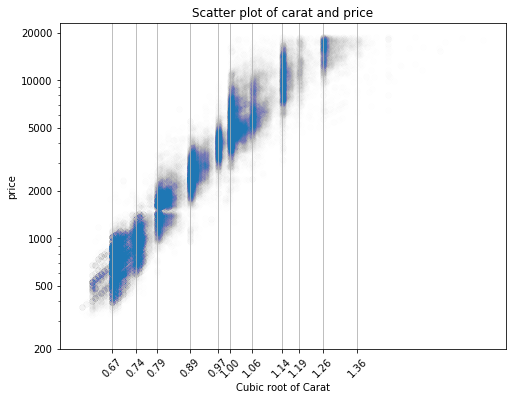

In [71]:
plt.figure(figsize = [8, 6])

ticks1 = [200,500,1000,2000,5000,10000,20000]
labels1 = ['{}'.format(v) for v in ticks1]
ticks2 = [0.3,0.4,0.5,0.7,0.9,1.0,1.2,1.5,1.7,2.0,2.5]
new = []
for i in ticks2:
    new.append(i**(1/3))
ticks2 = new
labels2 = ['{:0.2f}'.format(v) for v in ticks2]

plt.scatter(diamonds.cub_root_carat,diamonds.price,alpha = 1/200)
plt.grid(axis = 'x', which = 'major')
plt.yscale('log')
plt.yticks(ticks1,labels1)
plt.xticks(ticks2,labels2,rotation = 45)
plt.title('Scatter plot of carat and price')
plt.xlabel('Cubic root of Carat')
plt.ylabel('price')
plt.show();

- Does the plot has an informative title?
- Are the axis labels informative?
- Are the tick values interpretable?
- Do we need to worry about any of the plot aesthetics?

- The original plot's vertical axis only has two tick marks, and they're in scientific notation. Not only is it not clear that the data is on a power scale, it's also difficult to parse. We can solve both of these problems by specifying the tick marks. Take advantage of the 1-2-5-10 sequence to set which tick marks to show.
- As for the horizontal axis, the values are in terms of the cube-root transformed values, rather than in raw carat values. This presents an obstacle to interpretability. Once again, we should specify tick locations: the peaks observed in the univariate distribution might be good choices. Note that we also need to make use of the cuberoot_trans() function since the transformation is non-standard.
- There's a lot of overplotting in the scatterplot as given. Try playing with the alpha parameter to try and make the main trend stand out more.


The second plot that you will polish is a multivariate plot of price against levels of color and cut, for diamonds of about 1 carat weight. Make additions and revisions to the code below to refine the given plot.

''

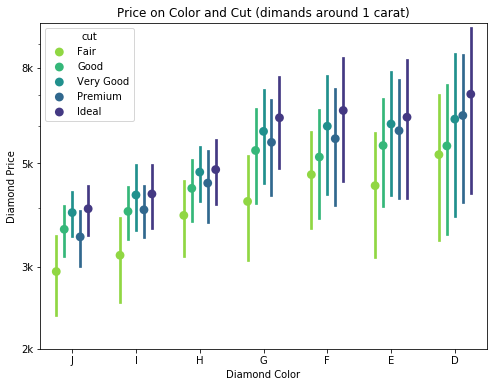

In [81]:
# select diamonds of approximately 1 carat
one_carat = diamonds.query('carat >= 0.99 and carat <= 1.03')

plt.figure(figsize = [8,6])
ticks = [2000,3000,5000,8000]
labels = ['2k','3k','5k','8k']

ax = sb.pointplot(data = one_carat, x = 'color' , y = 'price' ,hue = 'cut',
             ci = 'sd', linestyles = '', palette = 'viridis_r',dodge = 0.5)

plt.title('Price on Color and Cut (dimands around 1 carat)')
plt.xlabel('Diamond Color')
plt.yscale('log')
plt.yticks(ticks,labels)
plt.ylabel('Diamond Price')
plt.ylim(2000,10000)
ax.set_yticklabels([], minor = True)
;

- Don't forget to provide an informative title and axis labels.
- There's a few things with the pointplot function that we can revise. First of all, the default color palette used is qualitative, but we should probably choose a sequential palette instead. We could also stand to add a dodge parameter so that the points aren't stacked directly on top of one another and to make individual points easier to read. One other possible modification we could add is to remove the line connecting points on each level of cut: with the other changes made, removing the connecting line can help reduce the ink used, cleaning up the presentation.

In [83]:
import math

math.degrees(math.atan(1/2))

26.565051177077994

$$ \vec{a}$$